In [ ]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV and Perform Basic Data Cleaning

Create a Random Sample Dataframe to get random an equal number of random values for white wine data
Red wine data has 1599 rows, and White wine data has 4898 rows

In [4]:
red_wine_df = pd.read_csv("winequality-red.csv", sep=';')
white_df = pd.read_csv("winequality-white.csv", sep=';')
white_wine_df = white_df.copy()
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


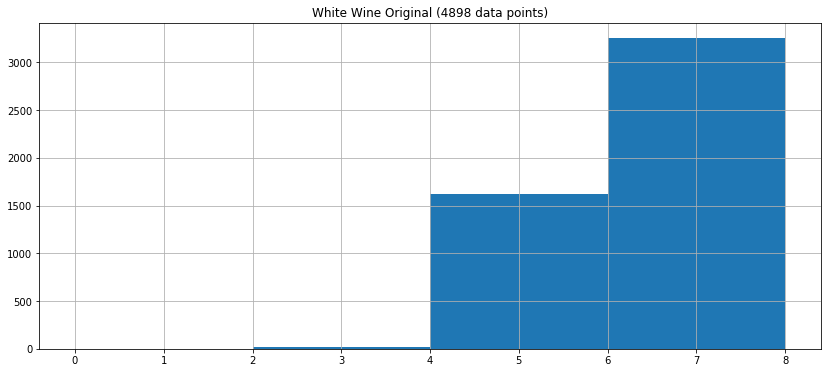

In [5]:
bin_values = np.arange(start=0, stop=10, step=2)
white_df['quality'].hist(bins=bin_values, figsize=[14,6])
plt.title("White Wine Original (4898 data points)")
plt.show()

In [6]:
bin_values = np.arange(start=0, stop=9, step=2)
rand_white_df['quality'].hist(bins=bin_values, figsize=[14,6])
plt.title("White Wine Randomized (1599 random data points)")
plt.show()

NameError: name 'rand_white_df' is not defined

In [ ]:
bin_values = np.arange(start=0, stop=9, step=2)
red_wine_df['quality'].hist(bins=bin_values, figsize=[14,6])
plt.title("Red Wine Original (1599 data points)")
plt.show()

In [ ]:
#Remove quality of 9's, because only white wine data has five 9 qualities which would skew our data
new_white_df = white_wine_df[white_wine_df["quality"] <= 8].copy()
#get random sample
rand_white_df = new_white_df.sample(1599,random_state=54).reset_index(drop=True)
rand_white_df
#add color rows
rand_white_df["color"] = "white"
red_wine_df["color"] = "red"
# rand_white_df
# red_wine_df
new_combinedf = pd.concat([red_wine_df, rand_white_df,])
#red wine is 0 and white wine is 1
combinedf = pd.get_dummies(new_combinedf, columns=['color'])
new_one_combinedf = combinedf.drop(columns=["color_red"]).copy()
new_one_combinedf.rename(columns={color_white})

In [ ]:
combinedf = combinedf.loc[\
(combinedf["quality"] < 9 ) & \
(combinedf["quality"] > 3 )  \
] 
combinedf

In [7]:
# df1 = pd.read_csv("winequality-white.csv", sep=';')
# df2 = pd.read_csv("winequality-red.csv", sep=';')
# combinedf = pd.concat([df1,df2])
# combinedf = combinedf.dropna(axis='columns', how='all')
# # Drop the null rows
# combinedf = combinedf.dropna()
# combinedf.head()

In [8]:
combinedf.groupby('quality').count()

NameError: name 'combinedf' is not defined

In [9]:
red_wine_df = pd.read_csv("winequality-red.csv", sep=';')
white_wine_df = pd.read_csv("winequality-white.csv", sep=';')
white_wine_df.info()
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64

In [10]:
random_white_df = white_wine_df.sample(1599,random_state=42).reset_index(drop=True)

In [19]:
baseline_red_df = red_wine_df.copy()
baseline_white_df = random_white_df.copy()
only_balanced_df = pd.concat([baseline_red_df, baseline_white_df])
only_balanced_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.7,0.34,0.31,16.4,0.051,20.0,146.0,0.99834,3.06,0.54,9.1,5
1595,9.3,0.31,0.49,1.3,0.042,34.0,147.0,0.99480,3.11,0.46,9.8,5
1596,6.4,0.17,0.27,6.7,0.036,88.0,223.0,0.99480,3.28,0.35,10.2,6
1597,7.5,0.29,0.36,15.7,0.050,29.0,124.0,0.99680,3.06,0.54,10.4,5


In [39]:
bin_balanced_df = only_balanced_df.copy()
bins = [0, 4, 6, 10]
group_names = [1, 2, 3]
bin_balanced_df["bin_quality"] = pd.cut(bin_balanced_df["quality"], bins, labels=group_names)
bin_qual_df = bin_balanced_df.drop(columns="quality")

bin_qual_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bin_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [42]:
bin_qual_df.groupby("bin_quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
bin_quality,,,,,,,,,,,
1,114,114,114,114,114,114,114,114,114,114,114
2,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
3,575,575,575,575,575,575,575,575,575,575,575


In [38]:
bin_qual_df.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,bin_quality
169,7.5,0.705,0.24,1.8,0.360,15.0,63.0,0.99640,3.00,1.59,9.50,2
1245,7.4,0.550,0.19,1.8,0.082,15.0,34.0,0.99655,3.49,0.68,10.50,2
853,4.7,0.670,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.60,2
289,7.7,0.250,0.43,4.5,0.062,20.0,115.0,0.99660,3.38,0.50,9.90,2
497,7.2,0.340,0.32,2.5,0.090,43.0,113.0,0.99660,3.32,0.79,11.10,2
1270,6.9,0.210,0.81,1.1,0.137,52.0,123.0,0.99320,3.03,0.39,9.20,2
1107,7.8,0.260,0.49,3.2,0.027,28.0,87.0,0.99190,3.03,0.32,11.30,3
303,7.4,0.670,0.12,1.6,0.186,5.0,21.0,0.99600,3.39,0.54,9.50,2
565,7.4,0.220,0.26,1.2,0.035,18.0,97.0,0.99245,3.12,0.41,9.70,2
1093,7.3,0.250,0.36,13.1,0.050,35.0,200.0,0.99860,3.04,0.46,8.90,3


# Select your features (columns)

In [22]:
# Set features. Drop quality disposition, y value. 
X = bin_qual_df.drop(columns='bin_quality')
#X = df.drop(columns='quality')
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Create a Train Test Split

Use `quality` for the y values

In [23]:
from sklearn.model_selection import train_test_split
#80% train, 20% test. y is this one column
#y = df['quality']
y = bin_qual_df['bin_quality']
#random state 42 will have same picks for x test and y test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [24]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
156,5.7,0.210,0.32,1.6,0.030,33.0,122.0,0.99044,3.33,0.52,11.9
571,6.2,0.360,0.24,2.2,0.095,19.0,42.0,0.99460,3.57,0.57,11.7
976,7.2,0.410,0.30,2.1,0.083,35.0,72.0,0.99700,3.44,0.52,9.4
275,7.9,0.545,0.06,4.0,0.087,27.0,61.0,0.99650,3.36,0.67,10.7
1008,8.9,0.350,0.40,3.6,0.110,12.0,24.0,0.99549,3.23,0.70,12.0


# Pre-processing

Scale the data using LabelEncoder and MinMaxScaler

In [25]:
# Scale your data - see Activity 03/05
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [27]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [28]:
y_train_categorical.shape

(2558, 3)

# Train the Model

In [29]:
# first, create a normal neural network with 11 inputs, 100 hidden nodes, and 3 outputs
model = Sequential()
model.add(Dense(units=10, activation='relu', input_dim=11))
model.add(Dense(units=100, activation='relu'))
#model.add(Dense(units=10000, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [30]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1100      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 1,523
Trainable params: 1,523
Non-trainable params: 0
_________________________________________________________________


In [32]:
# set early stopping as callback
callbacks = [EarlyStopping(monitor='val_loss', patience=2)]
model.fit(
    X_train_scaled,
    y_train_categorical,
    callbacks=callbacks,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 0s - loss: 0.7232 - accuracy: 0.7846
Epoch 2/60
 - 0s - loss: 0.6085 - accuracy: 0.7846
Epoch 3/60
 - 0s - loss: 0.5656 - accuracy: 0.7846
Epoch 4/60


/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 0s - loss: 0.5361 - accuracy: 0.7862
Epoch 5/60
 - 0s - loss: 0.5275 - accuracy: 0.7838
Epoch 6/60
 - 0s - loss: 0.5179 - accuracy: 0.7885
Epoch 7/60
 - 0s - loss: 0.5147 - accuracy: 0.7916
Epoch 8/60
 - 0s - loss: 0.5103 - accuracy: 0.7963
Epoch 9/60
 - 0s - loss: 0.5044 - accuracy: 0.7963
Epoch 10/60
 - 0s - loss: 0.5051 - accuracy: 0.7928
Epoch 11/60
 - 0s - loss: 0.5048 - accuracy: 0.7991
Epoch 12/60
 - 0s - loss: 0.5013 - accuracy: 0.7987
Epoch 13/60
 - 0s - loss: 0.5009 - accuracy: 0.7963
Epoch 14/60
 - 0s - loss: 0.4990 - accuracy: 0.7975
Epoch 15/60
 - 0s - loss: 0.5007 - accuracy: 0.7955
Epoch 16/60
 - 0s - loss: 0.4972 - accuracy: 0.7975
Epoch 17/60
 - 0s - loss: 0.4967 - accuracy: 0.7983
Epoch 18/60
 - 0s - loss: 0.4948 - accuracy: 0.8014
Epoch 19/60
 - 0s - loss: 0.4951 - accuracy: 0.7983
Epoch 20/60
 - 0s - loss: 0.4951 - accuracy: 0.7932
Epoch 21/60
 - 0s - loss: 0.4934 - accuracy: 0.8014
Epoch 22/60
 - 0s - loss: 0.4928 - accuracy: 0.7967
Epoch 23/60
 - 0s - loss: 0.4

In [33]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.5100506916642189, Accuracy: 0.793749988079071


In [34]:
encoded_predictions = model.predict_classes(X_test_scaled[:100])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [35]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:100])}")

Predicted classes: [1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 2 2
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 2 1 1 1
 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1]
Actual Labels: [1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1]


# RESULTS

quality = 5,6,7

test size = .1

model.add(Dense(units=100, activation='relu', input_dim=11))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

Normal Neural Network - Loss: 0.816428262801847, Accuracy: 0.6056105494499207

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'redwinedeeplearning.sav'
# joblib.dump(model, filename)